In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import importlib
import os
import sys

from base.experiment import *
from algorithms.langevin import *
from logistic.env_logistic import *
from logistic.agent_logistic import *
import plotnine as gg

In [2]:
# name = 'logistic'
num_articles = 1
dim = 2
n_steps=1000
agent = DefaultAgent(dim)
env = LogisticBandit(num_articles, 
                     dim, 
                     NormalDist(0,1,dim=dim), 
                     NormalDist(0,1,dim=dim))
"""
agent = DefaultAgent(dim+1)
env = LogisticBandit(num_articles, 
                     dim+1, 
                     NormalDist(0,1,dim=dim+1), 
                     DistributionWithConstant(NormalDist(0,1,dim=dim)))
"""
experiment = ExperimentNoAction(agent, env, n_steps,seed=0)



theta [ 1.01364161 -0.44944357]


In [3]:
experiment.run_experiment()

In [4]:
pts = agent.contexts
#pts = agent.contexts[:,1:]

df = pd.DataFrame(pts, columns=['x','y'])
df_r = pd.DataFrame(agent.rewards, columns=['reward'])

#https://stackoverflow.com/questions/40468069/merge-two-dataframes-by-index/40468090
df = pd.merge(df, df_r, left_index=True, right_index=True)
df

,x,y,reward
0,1.764052,0.400157,1.0
1,-2.268328,1.333545,0.0
2,0.950088,-0.151357,0.0
3,1.266119,-0.505877,1.0
4,0.761038,0.121675,1.0
5,0.484312,0.579140,0.0
6,1.494079,-0.205158,1.0
7,-0.960755,0.376927,1.0
8,-2.552990,0.653619,0.0
9,-0.242150,1.514391,0.0


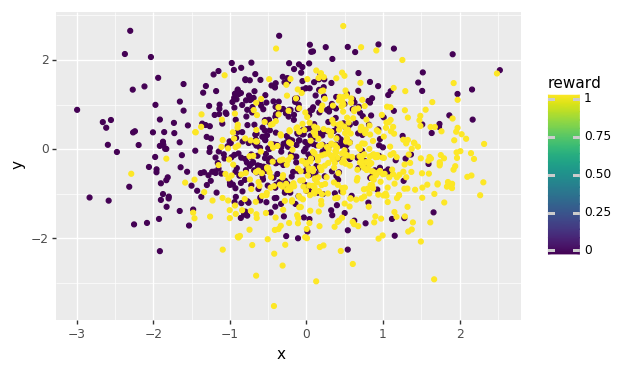

<ggplot: (8752049715197)>

In [5]:
(gg.ggplot(df)
 + gg.aes('x', 'y', color='reward', group='reward')
 + gg.geom_point())

# Langevin

In [6]:
samples = np.zeros((0,dim))
for i in range(5):
    x = langevin(dim, [agent.contexts, agent.rewards], logistic_grad_f, Gaussian_prior_grad_f([0,0]), 
                 step_size = 0.0001, n_steps=1000, init_pt=None)
    samples = np.append(samples,[x], axis=0)

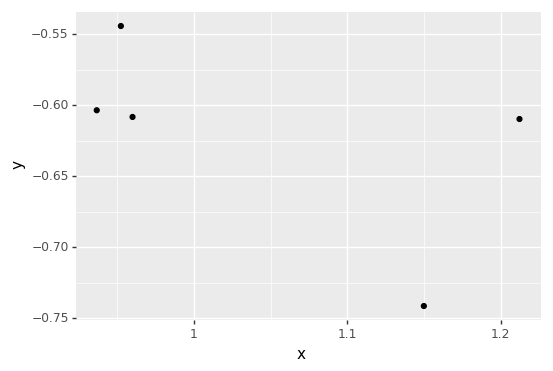

<ggplot: (8752009096257)>

In [7]:
df_samples = pd.DataFrame(samples, columns = ['x','y'])
(gg.ggplot(df_samples)
 + gg.aes('x', 'y')
 + gg.geom_point())

In [ ]:
samples = np.zeros((0,dim))
for i in range(100):
    x = langevin(dim, [agent.contexts, agent.rewards], logistic_grad_f, Gaussian_prior_grad_f([0,0]), 
                 step_size = 0.01, n_steps=1000, init_pt=None)
    samples = np.append(samples,[x], axis=0)
    
df_samples = pd.DataFrame(samples, columns = ['x','y'])
(gg.ggplot(df_samples)
 + gg.aes('x', 'y')
 + gg.geom_point())

In [ ]:
samples = np.zeros((0,dim))
for i in range(100):
    x = langevin(dim, [agent.contexts, agent.rewards], logistic_grad_f, Gaussian_prior_grad_f([0,0]), 
                 step_size = 0.005, n_steps=1000, init_pt=None)
    samples = np.append(samples,[x], axis=0)
    
df_samples = pd.DataFrame(samples, columns = ['x','y'])
(gg.ggplot(df_samples)
 + gg.aes('x', 'y')
 + gg.geom_point())

In [ ]:
samples = np.zeros((0,dim))
for i in range(50):
    x = langevin(dim, [agent.contexts, agent.rewards], logistic_grad_f, Gaussian_prior_grad_f([0,0]), 
                 step_size = 0.005, n_steps=2000, init_pt=None)
    samples = np.append(samples,[x], axis=0)
    
df_samples = pd.DataFrame(samples, columns = ['x','y'])
(gg.ggplot(df_samples)
 + gg.aes('x', 'y')
 + gg.geom_point())

# MALA

In [13]:
samples = np.zeros((0,dim))
for i in range(10):
    x, accepts = mala(dim, [agent.contexts, agent.rewards], logistic_f, Gaussian_prior_f([0,0]), 
                 logistic_grad_f, Gaussian_prior_grad_f([0,0]), 
                 step_size = 0.01, n_steps=1000, init_pt=None)
    print(accepts)
    samples = np.append(samples,[x], axis=0)

320
307
360
352
351
336
319
315
346
358


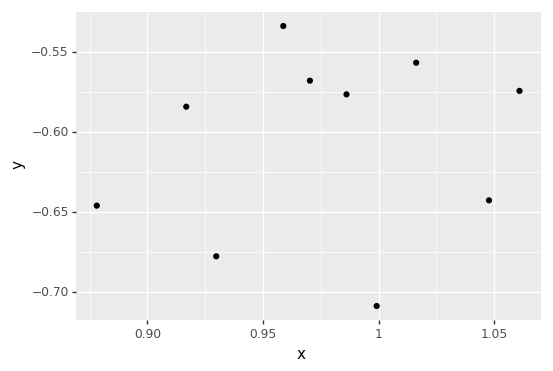

<ggplot: (8752009059453)>

In [14]:
df_samples = pd.DataFrame(samples, columns = ['x','y'])
(gg.ggplot(df_samples)
 + gg.aes('x', 'y')
 + gg.geom_point())

# PolyaGamma

In [10]:
from pypolyagamma import BernoulliRegression, logistic

samples = np.zeros((0,dim))
for i in range(20):
    reg = BernoulliRegression(1,  dim)
    reg.resample((agent.contexts,np.transpose([agent.rewards])))
    print(reg.A)
    sample = reg.A[0]
    samples = np.append(samples,[sample], axis=0)

[[ 0.94161939 -0.71142858]]
[[ 1.17664892 -0.72207957]]
[[ 1.19475281 -0.74205924]]
[[ 0.82461768 -0.51180273]]
[[ 1.79046073 -1.08524073]]
[[ 1.26116898 -0.75680869]]
[[ 1.5463705  -0.77571459]]
[[ 1.91844888 -1.18445999]]
[[ 1.43300994 -0.81670859]]
[[ 0.9215973  -0.68689438]]
[[ 0.96767614 -0.74496149]]
[[ 0.73412877 -0.58190975]]
[[ 1.20626651 -0.8383897 ]]
[[ 0.9357329 -0.7081651]]
[[ 1.56811664 -1.04910531]]
[[ 1.436461   -0.94365525]]
[[ 1.6594325  -0.97549453]]
[[ 1.42650424 -0.73028731]]
[[ 1.28021188 -0.74144137]]
[[ 0.99358913 -0.57967497]]


/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/pypolyagamma/__init__.py:15: UserWarning: PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will be replaced with a serial implementation.
  warn("PyPolyaGamma was not installed with OpenMP. Calls to 'pgdrawvpar' will "
/home/optml/holdenl/ts_tutorial/src/ts_tutoria

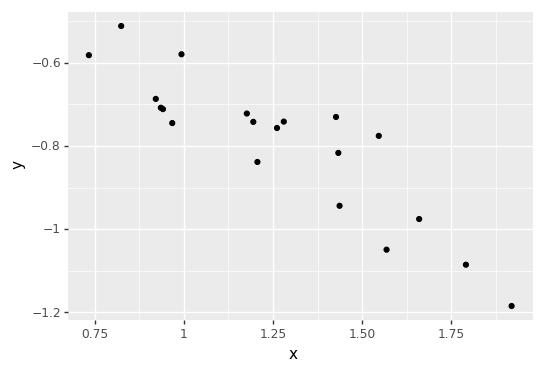

<ggplot: (8752009197989)>

In [11]:
df_samples = pd.DataFrame(samples, columns = ['x','y'])
(gg.ggplot(df_samples)
 + gg.aes('x', 'y')
 + gg.geom_point())

# Scratch

In [ ]:

theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
batch_size = 50
step_count=200
step_size= 1/200

num_articles = 3
dim = 7
theta_mean = 0
theta_std = 1
epsilon1 = 0.01
epsilon2 = 0.05
batch_size = 50
step_count=200
step_size= 1/200


In [ ]:
np.asarray([2,3])*np.asarray([4,5])

In [16]:
for t in range(5):
    if t==6:
        break
        
t

4